# Imports

In [1]:
import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
nodes_df = pd.read_csv('data/q1/politician_nodes.csv')
edges_df = pd.read_csv('data/q1/politician_edges.csv')

# Part A

In [3]:
g = ig.Graph.TupleList(edges_df.itertuples(index=False), directed=False) # since its mutal likes
g.vs['name'] = [str(i) for i in g.vs['name']]
name_map = dict(zip(nodes_df['id'].astype(str), nodes_df['page_name']))

In [4]:
deg = g.degree()
norm_deg = [d / (g.vcount() - 1) for d in deg]
ev = g.eigenvector_centrality()
close = g.closeness()
results = pd.DataFrame({
    'node_id': g.vs['name'],
    'real_name': [name_map.get(n, "Unknown") for n in g.vs['name']],
    'degree': norm_deg,
    'eigenvector': ev,
    'closeness': close
})

In [5]:
print(results.nlargest(10, 'degree'))
print(results.nlargest(10, 'eigenvector'))
print(results.nlargest(10, 'closeness'))

    node_id               real_name    degree  eigenvector  closeness
97    14650           Manfred Weber  0.056716     0.072494   0.282462
809   20415        Joachim Herrmann  0.044425     0.045930   0.260593
786   21491         Katarina Barley  0.038982     1.000000   0.254298
788    3070          Arno Klare MdB  0.038455     0.985071   0.253449
791    7357              Katja Mast  0.037928     0.968091   0.273207
389   11003            Barack Obama  0.034416     0.082600   0.352217
547   18155           Angela Merkel  0.032485     0.094844   0.288647
427   18819             Niels Annen  0.031080     0.796167   0.307406
438   17056           Martin Schulz  0.030553     0.733113   0.279482
150   16809  Sir Peter Bottomley MP  0.030202     0.000017   0.213568
     node_id             real_name    degree  eigenvector  closeness
786    21491       Katarina Barley  0.038982     1.000000   0.254298
788     3070        Arno Klare MdB  0.038455     0.985071   0.253449
791     7357           

Top 10 Nodes with Highest Power Efficiency (Low Degree/High Eigenvector):
                 real_name    degree  eigenvector  residual
782        Christian Petry  0.028797     0.910655  0.618282
790         Heike Baehrens  0.029148     0.907431  0.611375
786        Katarina Barley  0.038982     1.000000  0.600832
775          Klaus Mindrup  0.025110     0.847734  0.594028
788         Arno Klare MdB  0.038455     0.985071  0.591427
827   Michelle Müntefering  0.022651     0.815720  0.587793
791             Katja Mast  0.037928     0.968091  0.579970
1200        Sigmar Gabriel  0.023529     0.776901  0.539767
792       Johannes Schraps  0.024583     0.780716  0.532534
1449     Wolfgang Hellmich  0.018613     0.701666  0.516088


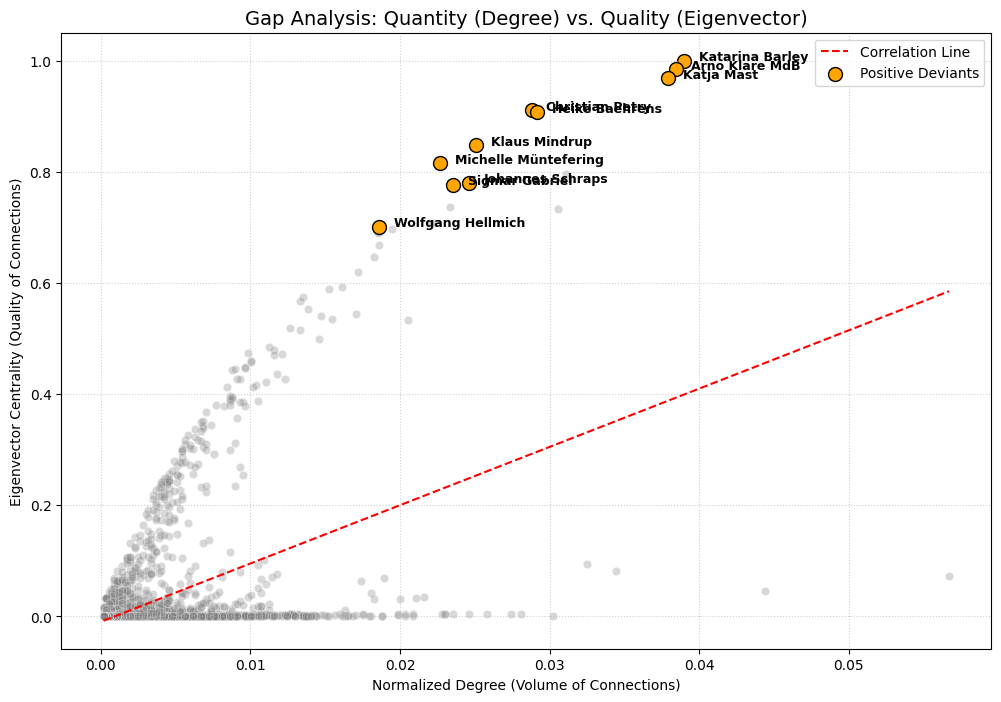

In [6]:
slope, intercept, r_value, p_value, std_err = stats.linregress(results['degree'], results['eigenvector'])
results['expected_ev'] = intercept + slope * results['degree']
results['residual'] = results['eigenvector'] - results['expected_ev']
top_deviants = results.nlargest(10, 'residual')
print("Top 10 Nodes with Highest Power Efficiency (Low Degree/High Eigenvector):")
print(top_deviants[['real_name', 'degree', 'eigenvector', 'residual']])
plt.figure(figsize=(12, 8))
sns.scatterplot(data=results, x='degree', y='eigenvector', alpha=0.3, color='gray')
x_vals = np.array([results['degree'].min(), results['degree'].max()])
plt.plot(x_vals, intercept + slope * x_vals, color='red', linestyle='--', label='Correlation Line')
plt.scatter(top_deviants['degree'], top_deviants['eigenvector'], color='orange', s=100, edgecolors='black', label='Positive Deviants')
for i, row in top_deviants.iterrows():
    plt.text(row['degree'] + 0.001, row['eigenvector'], row['real_name'], fontsize=9, fontweight='bold')

plt.title('Gap Analysis: Quantity (Degree) vs. Quality (Eigenvector)', fontsize=14)
plt.xlabel('Normalized Degree (Volume of Connections)')
plt.ylabel('Eigenvector Centrality (Quality of Connections)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

In [7]:
results['deg_rank'] = results['degree'].rank(ascending=False)
results['ev_rank'] = results['eigenvector'].rank(ascending=False)
results['close_rank'] = results['closeness'].rank(ascending=False)

candidates = results[(results['deg_rank'] > 100) & (results['ev_rank'] <= 50)].head(3)
print(candidates)

    node_id          real_name    degree  eigenvector  closeness  expected_ev  \
444   13175  Carsten Schneider  0.008780     0.442962   0.282378     0.082465   
445    8335        Bernd Lange  0.011765     0.436510   0.288940     0.113767   
777    7860  Barbara Hendricks  0.011238     0.484816   0.252875     0.108243   

     residual  deg_rank  ev_rank  close_rank  
444  0.360497     228.5     43.0        29.0  
445  0.322743     118.0     44.0        14.0  
777  0.376573     130.5     33.0       283.5  


## Part B

In [8]:
bt = g.betweenness()
results['betweenness'] = bt
results['bt_rank'] = results['betweenness'].rank(ascending=False)
top_10_bt = results.nsmallest(10, 'bt_rank').copy()
print(top_10_bt[['real_name', 'betweenness', 'bt_rank', 'deg_rank']])

            real_name   betweenness  bt_rank  deg_rank
389      Barack Obama  6.753905e+06      1.0       6.0
398   Hillary Clinton  1.099614e+06      2.0     145.5
547     Angela Merkel  9.769866e+05      3.0       7.0
118    Justin Trudeau  9.754347e+05      4.0      27.0
55   Malcolm Turnbull  9.208801e+05      5.0      35.5
97      Manfred Weber  8.886756e+05      6.0       1.0
894      Peter Tauber  7.727473e+05      7.0      38.0
111     Betinho Gomes  7.399578e+05      8.0     122.0
427       Niels Annen  7.078794e+05      9.0       8.0
345     Boris Johnson  6.080676e+05     10.0     679.5


# Part C

In [9]:
n = g.vcount()
results['norm_degree'] = [d / (n - 1) for d in g.degree()]
results['closeness'] = g.closeness()
top_10_closeness = results.nlargest(10, 'closeness').copy()
top_10_closeness['closeness_rank'] = top_10_closeness['closeness'].rank(ascending=False)

print("Top 10 Politicians by Closeness Centrality (The Geometric Heart):")
print(top_10_closeness[['real_name', 'closeness', 'norm_degree']])

Top 10 Politicians by Closeness Centrality (The Geometric Heart):
               real_name  closeness  norm_degree
389         Barack Obama   0.352217     0.034416
437         Michael Roth   0.309343     0.020544
427          Niels Annen   0.307406     0.031080
1821         Tanja Fajon   0.302042     0.007902
55      Malcolm Turnbull   0.299642     0.019842
1215  Mariano Rajoy Brey   0.299280     0.011238
443           Achim Post   0.298997     0.022125
894         Peter Tauber   0.296800     0.018964
780       Dietmar Nietan   0.293905     0.023354
398      Hillary Clinton   0.293829     0.010711


In [10]:

results['closeness_rank'] = results['closeness'].rank(ascending=False)
results['degree_rank'] = results['degree'].rank(ascending=False)

top_left_candidates = results[
    (results['closeness_rank'] <= 20) & 
    (results['degree_rank'] > 100)
].head(3)

print("Politicians in the Top-Left Quadrant (Efficient Access):")
print(top_left_candidates[['real_name', 'closeness_rank', 'degree_rank']])

Politicians in the Top-Left Quadrant (Efficient Access):
           real_name  closeness_rank  degree_rank
398  Hillary Clinton            10.0        145.5
445      Bernd Lange            14.0        118.0
629  Gianni Pittella            18.0       1236.5


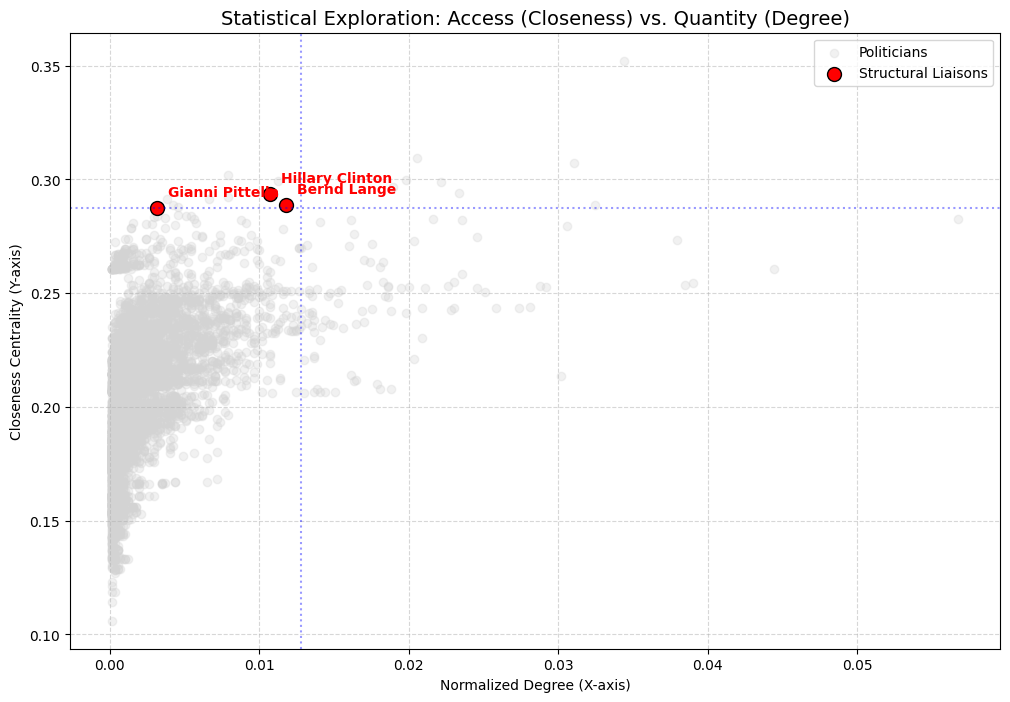

In [11]:

plt.figure(figsize=(12, 8))

plt.scatter(results['degree'], results['closeness'], alpha=0.3, color='lightgray', label='Politicians')

plt.scatter(top_left_candidates['degree'], top_left_candidates['closeness'], 
            color='red', s=100, edgecolor='black', label='Structural Liaisons')


for i, row in top_left_candidates.iterrows():
    plt.annotate(row['real_name'], 
                 (row['degree'], row['closeness']),
                 xytext=(8, 8), textcoords='offset points',
                 fontsize=10, fontweight='bold', color='red')


plt.title('Statistical Exploration: Access (Closeness) vs. Quantity (Degree)', fontsize=14)
plt.xlabel('Normalized Degree (X-axis)')
plt.ylabel('Closeness Centrality (Y-axis)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.axhline(y=top_left_candidates['closeness'].min(), color='blue', linestyle=':', alpha=0.4)
plt.axvline(x=results.sort_values('degree', ascending=False).iloc[100]['degree'], color='blue', linestyle=':', alpha=0.4)

plt.show()

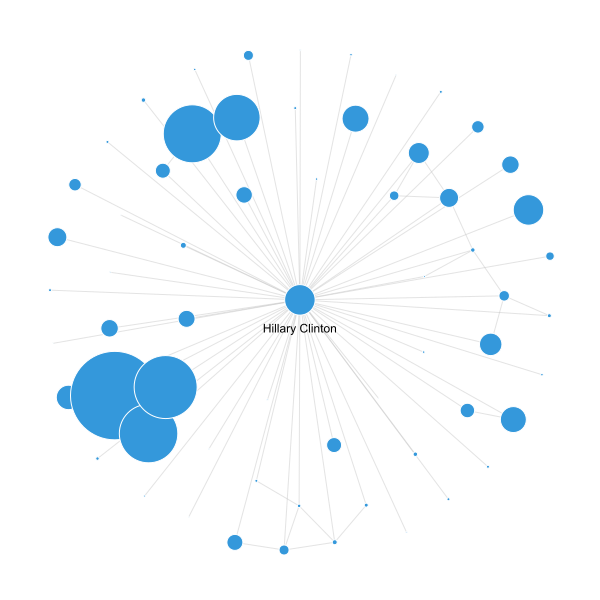

In [20]:
target_id = "5448" 
target_index = g.vs.find(name=target_id).index
ego_nodes = g.neighborhood(target_index, order=1)
ego_net = g.induced_subgraph(ego_nodes)
ego_net.vs["size"] = [g.degree(v) * 0.5 for v in ego_net.vs["name"]]
ego_net.vs["label"] = ["Hillary Clinton" if id == target_id else "" 
                       for id in ego_net.vs["name"]]

layout = ego_net.layout_fruchterman_reingold(niter=1000)

ig.plot(ego_net, 
        layout=layout,
        vertex_color="#3498db",
        vertex_frame_color="white",
        edge_color="rgba(200, 200, 200, 0.5)",
        vertex_label_size=12,
        vertex_label_dist=1.5,
        bbox=(600, 600),
        margin=50)

In [28]:
A = np.array(g.get_adjacency().data)

eigvals = np.linalg.eigvals(A)
lambda_max = max(eigvals.real)

kappa = 1 / lambda_max

print(f"Largest Eigenvalue (λ_max): {lambda_max:.4f}")
print(f"Convergence Bound (1/λ_max): {kappa:.4f}")


Largest Eigenvalue (λ_max): 60.6432
Convergence Bound (1/λ_max): 0.0165


In [32]:
def bonacich_power(A, beta):
    n = A.shape[0]
    I = np.eye(n)
    try:
        x = np.linalg.solve(I - beta * A, np.ones(n))
        return x
    except np.linalg.LinAlgError:
        raise ValueError("Beta too large; series does not converge.")


In [44]:
beta_neutral = 0.0
beta_supportive = 0.5 * kappa  
beta_suppressive = -0.5 * kappa 

power_neutral = bonacich_power(A, beta_neutral)
power_supportive = bonacich_power(A, beta_supportive)
power_suppressive = bonacich_power(A, beta_suppressive)

print("Bonacich Power Scores:")
print("Neutral (β=0):", np.round(power_neutral, 4))
print("Supportive (β>0):", np.round(power_supportive, 4))
print("Suppressive (β<0):", np.round(power_suppressive, 4))


Bonacich Power Scores:
Neutral (β=0): [1. 1. 1. ... 1. 1. 1.]
Supportive (β>0): [1.5619 1.7596 1.4989 ... 1.0099 1.0084 1.0104]
Suppressive (β<0): [0.7563 0.6902 0.8308 ... 0.9932 0.9919 0.9933]


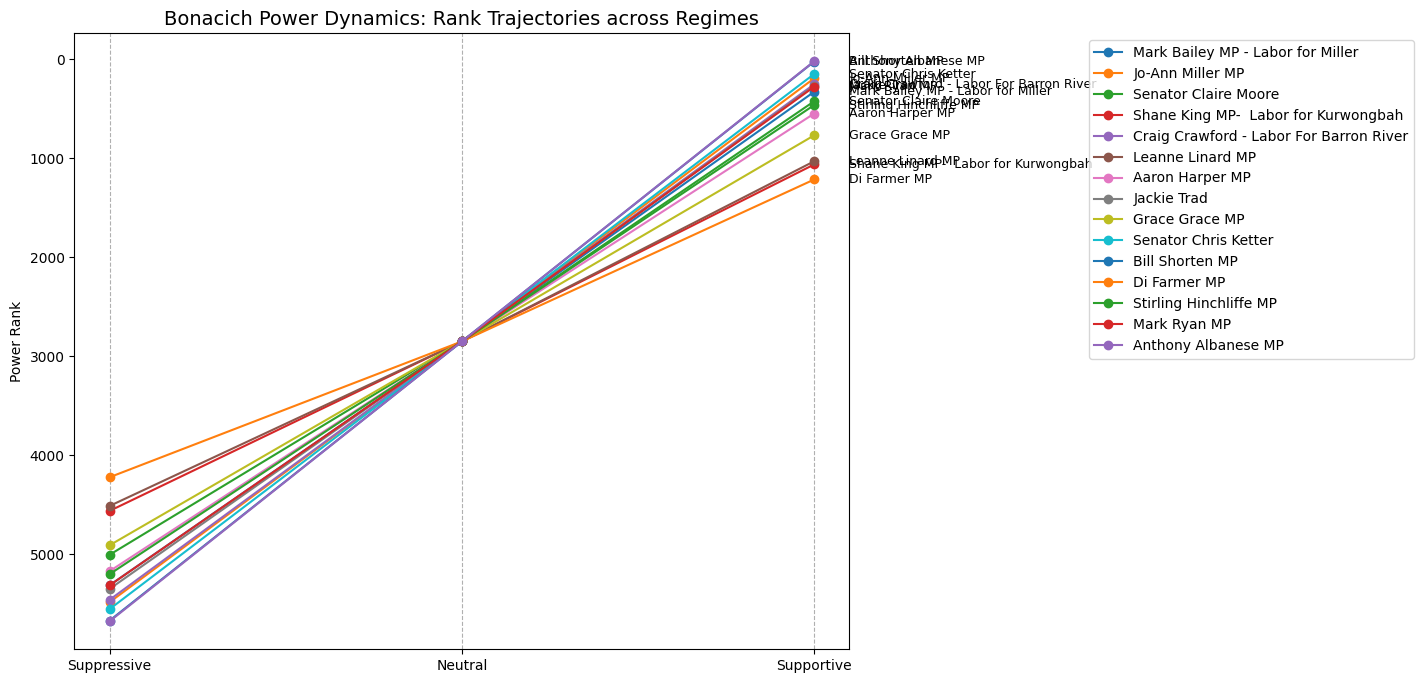

In [45]:

df_ranks = pd.DataFrame({
    'Name': results['real_name'],
    'Suppressive': pd.Series(power_suppressive).rank(ascending=False),
    'Neutral': pd.Series(power_neutral).rank(ascending=False),
    'Supportive': pd.Series(power_supportive).rank(ascending=False)
})

key_nodes = df_ranks.nsmallest(15, 'Neutral')
plt.figure(figsize=(10, 8))
regimes = ['Suppressive', 'Neutral', 'Supportive']

for i, row in key_nodes.iterrows():
    plt.plot(regimes, [row['Suppressive'], row['Neutral'], row['Supportive']], marker='o', label=row['Name'])
    plt.text(2.1, row['Supportive'], row['Name'], va='center', fontsize=9)

plt.gca().invert_yaxis() # Rank 1 at the top
plt.title('Bonacich Power Dynamics: Rank Trajectories across Regimes', fontsize=14)
plt.ylabel('Power Rank')
plt.grid(axis='x', linestyle='--')
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left')
plt.show()

In [46]:
results['rank_supp'] = pd.Series(power_suppressive).rank(ascending=False)
results['rank_neu']  = pd.Series(power_neutral).rank(ascending=False)
results['rank_suppo'] = pd.Series(power_supportive).rank(ascending=False)
results['rank_shift'] = results['rank_suppo'] - results['rank_supp']
threshold = results['rank_shift'].std() 

def categorize_role(shift):
    if shift < -threshold:
        return "Power Amplifier"
    elif shift > threshold:
        return "Power Inhibitor"
    else:
        return "Stable Actor"

results['structural_role'] = results['rank_shift'].apply(categorize_role)

print(results['structural_role'].value_counts())

amplifiers = results[results['structural_role'] == "Power Amplifier"].nsmallest(5, 'rank_suppo')
inhibitors = results[results['structural_role'] == "Power Inhibitor"].nsmallest(5, 'rank_supp')
stable     = results[results['structural_role'] == "Stable Actor"].nsmallest(5, 'rank_neu')

structural_role
Stable Actor       3112
Power Inhibitor    1389
Power Amplifier    1195
Name: count, dtype: int64
